In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [238]:
df.shape

(119390, 32)

In [239]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [240]:
df.isnull().values.any()

True

In [241]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Replace missing values:

agent: If no agency is given, booking was most likely made without one.

company: If none given, it was most likely private.

rest should be self-explanatory.

In [242]:
df.fillna(0,inplace=True)

In [243]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [244]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [245]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [246]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [247]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [248]:
### seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time 

In [249]:
df.shape

(119390, 32)

In [250]:
len(df[df['adults']==0])

403

In [251]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [252]:
### Visualise Entire Dataframe where adult,children & babies are 0

In [253]:
pd.set_option('display.max_columns',32)

In [254]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [255]:
data=df[~filter]

In [256]:
data.shape

(119210, 32)

In [257]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [258]:
data.to_csv('cleaned_hotel_data.csv', index= False)

#### After cleaning, separate Resort and City hotel

In [259]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [260]:
resort.shape

(28927, 32)

In [261]:
city.shape

(46084, 32)

## Where do the guests come from?

In [262]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [263]:
labels=resort['country'].value_counts().index
values=resort['country'].value_counts()

In [264]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [265]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value'
               )

In [266]:
iplot([trace])

## Home country of Guests, perform Spatial Analysis

In [267]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','No of guests']
country_wise_data

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,GUY,1
162,MMR,1
163,CYM,1
164,ZMB,1


In [268]:
import folium
from folium.plugins import HeatMap

In [269]:
basemap=folium.Map()

In [270]:
country_wise_data.dtypes

country         object
No of guests     int64
dtype: object

In [271]:
# show on map
map_guest = px.choropleth(country_wise_data,
                    locations=country_wise_data['country'],
                    color=country_wise_data['No of guests'], 
                    hover_name=country_wise_data['country'], 
                    title="Home country of guests")
map_guest.show()

#### People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe

## How much do guests pay for a room per night?

In [272]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [273]:
data2=data[data['is_canceled']==0]

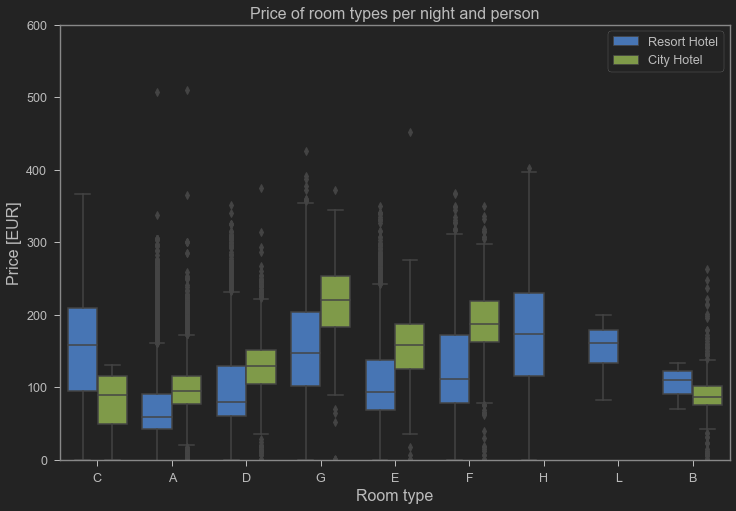

In [274]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=data2)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

#### This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

## How does the price per night vary over the year?

In [275]:
data_resort=resort[resort['is_canceled']==0]

In [276]:
data_city=city[city['is_canceled']==0]

In [277]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [278]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [279]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [280]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


#### now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion
#### so very first we have to provide right hierarchy to the month column

In [281]:
import sort_dataframeby_monthorweek as sd

In [282]:
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [283]:
px.line(final, x='month', y=['price_for_resort','price_for_city_hotel'], title='Room price per night over the Months')

### Conclusion-->> This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)., The price of the city hotel varies less and is most expensive during spring and autumn.

## Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

In [284]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


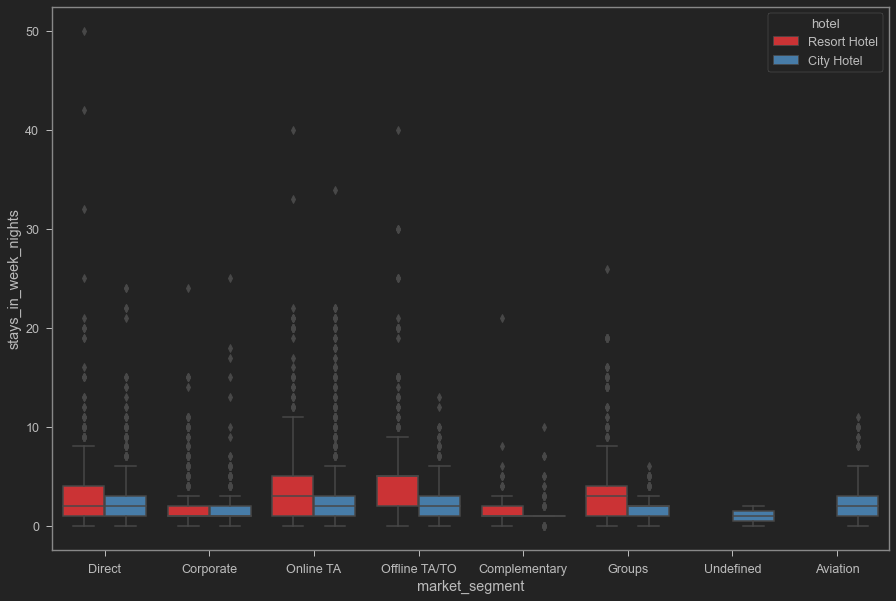

In [285]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = data, hue = "hotel", palette = 'Set1');


#### Conclusion-->>
    It can be seen that most of the groups are normal distributed, some of them have high skewness. Looking at the distribution, most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12-13 days
    It is obvious that when people go to resort hotels, they prefer to stay more.

## Analysing Preference of Guests, what they basically Prefer?

In [286]:
px.pie(data,names=data['meal'].value_counts().index,values=data['meal'].value_counts().values,hole=0.5)

#### Conclusion-->>
    Below the donut pie graph shows the meal categories. There is a big difference in the Bed&Breakfast category and the others. Almost 80% of bookings reserved for Bed&Breakfast.

## Simplify your analysis on the basis of different types of hotels & meals

In [287]:
data.groupby(['hotel','meal']).agg({'meal':'count'}).unstack()

meal                                  
meal               BB     FB      HB       SC Undefined
hotel                                                  
City Hotel    62233.0   44.0  6412.0  10474.0       NaN
Resort Hotel  30003.0  754.0  8046.0     75.0    1169.0

## Analyse Special Request done by Cuustomers¶

Text(0.5, 1.0, 'Total Special Request')

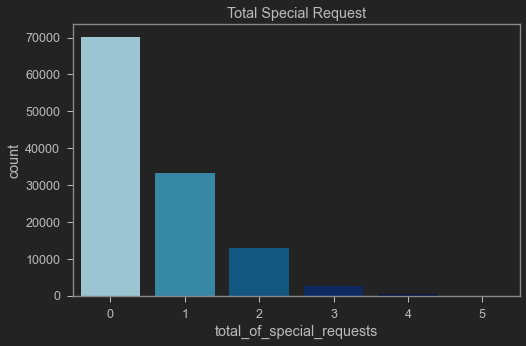

In [288]:
plt.figure(figsize=(8,5))
sns.countplot(x='total_of_special_requests', data=data, palette = 'ocean_r')
plt.title('Total Special Request')

#### Conclusion-->> 
    Around 55% of bookings do not have any special requests

In [289]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [290]:
pivot=data.groupby([ 'total_of_special_requests', 'is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'count'}).unstack()
pivot

count       
is_canceled                    0      1
total_of_special_requests              
0                          36667  33534
1                          25867   7316
2                          10086   2866
3                           2049    445
4                            304     36
5                             38      2

<AxesSubplot:xlabel='total_of_special_requests'>

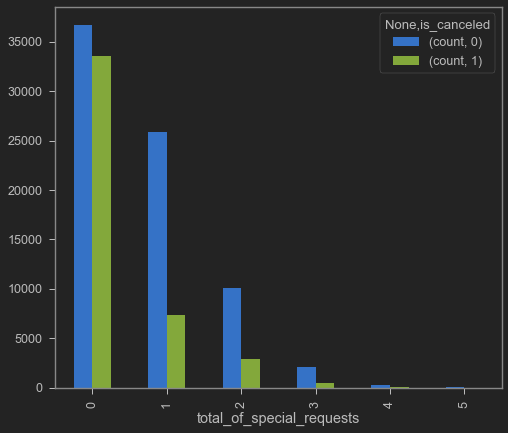

In [291]:
pivot.plot(kind='bar')

#### Conclusion-->> 
    This graph is about the relationship between special requests and cancellation booking status. Nearly half bookings without any special requests have been cancelled and another half of them have not been canceled.

## Which are the most busy month or in which months Guests are high?

In [292]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [293]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [294]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [295]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guests in resort','no of guest in city hotel']
final_rush

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [296]:
final_rush=sd.Sort_Dataframeby_Month(df=final_rush,monthcolumnname='month')
final_rush

,month,no of guests in resort,no of guest in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [297]:
final_rush.dtypes

month                        object
no of guests in resort        int64
no of guest in city hotel     int64
dtype: object

In [298]:
final_rush.columns

Index(['month', 'no of guests in resort', 'no of guest in city hotel'], dtype='object')

In [299]:
px.line(data_frame=final_rush, x='month', y=['no of guests in resort','no of guest in city hotel'], title='Total no of guests per Months')

### Conclusion
     The City hotel has more guests during spring and autumn, when the prices are also highest.
    In July and August there are less visitors, although prices are lower.

    Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
    Both hotels have the fewest guests during the winter.

## How long do people stay at the hotels?

In [300]:
filter=data['is_canceled']==0
clean_data=data[filter]

In [301]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [302]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

In [303]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [304]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [305]:
stay=stay.rename(columns={'is_canceled':'Number of stays'})
stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

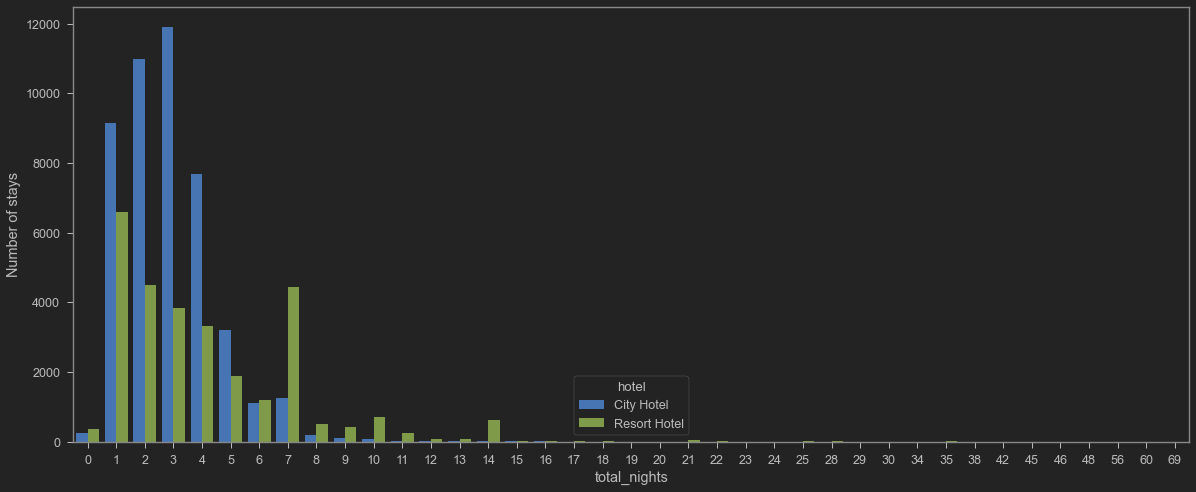

In [306]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

## Bookings by market segment

In [307]:
clean_data['market_segment'].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

In [308]:
# pie plot
fig=px.pie(clean_data,
             values=clean_data['market_segment'].value_counts().values,
             names=clean_data['market_segment'].value_counts().index,
             title="Bookings per market segment")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

##  price per night (ADR) and person based on booking and room

In [309]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


<AxesSubplot:xlabel='market_segment', ylabel='adr'>

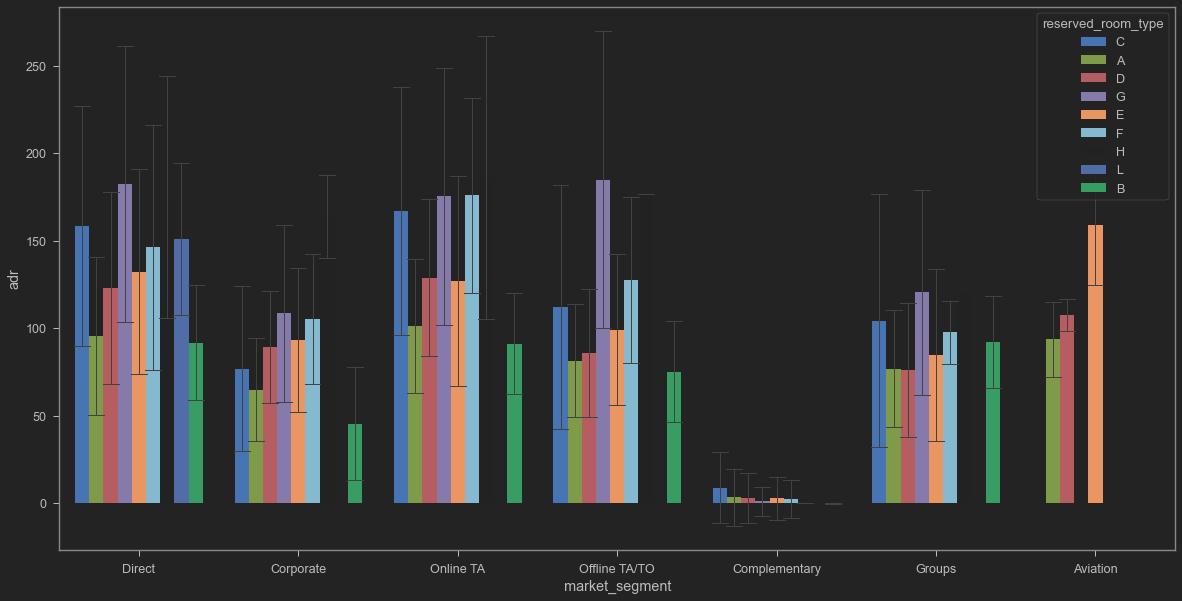

In [310]:
plt.figure(figsize=(20, 10))
sns.barplot(x="market_segment",
            y="adr",
            hue="reserved_room_type",
            data=clean_data,
            ci="sd",
            errwidth=1,
            capsize=0.1)

## How many bookings were cancelled?

In [311]:
cancel=data[data['is_canceled']==1]

In [312]:
rh_cancelations = cancel[cancel["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = cancel[cancel["hotel"] == "City Hotel"]["is_canceled"].sum()

In [313]:
rh_cancelations

11120

In [314]:
ch_cancelations

33079

In [315]:
### convert entire stats into percentage
px.pie(values=[11120,33079],names=[rh_cancelations,ch_cancelations])

## Which month have the highest number of cancellations?

In [316]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [317]:
cancellation=data[data['is_canceled']==1]
cancellation.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015


In [318]:
cancellation['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [319]:
cancel_month=data.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled=cancel_month.iloc[:,0:3]

In [320]:
cancelled

,arrival_date_month,hotel,is_canceled
0,April,City Hotel,7469
1,April,Resort Hotel,3609
2,August,City Hotel,8967
3,August,Resort Hotel,4894
4,December,City Hotel,4114
5,December,Resort Hotel,2645
6,February,City Hotel,4950
7,February,Resort Hotel,3102
8,January,City Hotel,3730
9,January,Resort Hotel,2191


In [321]:
cancelled=cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

,arrival_date_month,hotel,no of cancellations
0,April,City Hotel,7469
1,April,Resort Hotel,3609
2,August,City Hotel,8967
3,August,Resort Hotel,4894
4,December,City Hotel,4114
5,December,Resort Hotel,2645
6,February,City Hotel,4950
7,February,Resort Hotel,3102
8,January,City Hotel,3730
9,January,Resort Hotel,2191


In [322]:
final=sd.Sort_Dataframeby_Month(cancelled,'arrival_date_month')
final

,arrival_date_month,hotel,no of cancellations
0,January,City Hotel,3730
1,January,Resort Hotel,2191
2,February,City Hotel,4950
3,February,Resort Hotel,3102
4,March,City Hotel,6434
5,March,Resort Hotel,3334
6,April,City Hotel,7469
7,April,Resort Hotel,3609
8,May,City Hotel,8221
9,May,Resort Hotel,3559


<AxesSubplot:xlabel='arrival_date_month', ylabel='no of cancellations'>

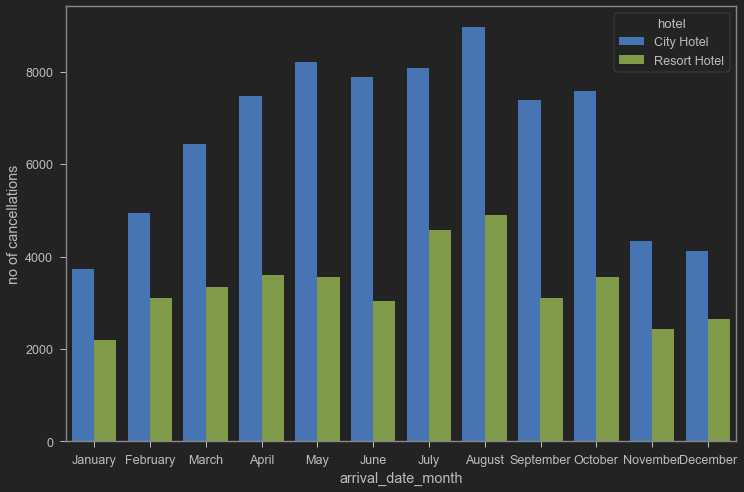

In [323]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "arrival_date_month", y = "no of cancellations" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=final)

#### conclusion 
    For the City hotel the relative number of cancelations is around 40 % throughout the year.
    For the Resort hotel it is highest in the summer and lowest during the winter.

In [324]:
# saving cleaned data for visualization
data.to_csv('cleaned_hotel_data.csv', index= False)
clean_data.to_csv('booked_data.csv', index=False)

### Selecting important feature using co-relation

In [325]:
data.corr().abs()['is_canceled'].sort_values(ascending= False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

From this list it is apparent that

-lead_time 

-total_of_special_requests 

-required_car_parking_spaces

-booking_changes

-previous_cancellations 

are the 5 most important numerical features.

However, to predict whether or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can change over time.

I will also not include days_in_waiting_list,booking changes  and arrival_date_year.

In [326]:
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [327]:
list_not=['days_in_waiting_list','arrival_date_year']
num_features= [col for col in data.columns if data[col].dtype!='O' and col not in list_not]

cat_not=['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country','days_in_waiting_list']
cat_features=[col for col in data.columns if data[col].dtype=='O' and col not in cat_not]
data_cat=data[cat_features]

In [328]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [329]:
data_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,9/6/2017
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,9/7/2017
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,9/7/2017
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,9/7/2017


In [330]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [331]:
data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])
data_cat['year']=data_cat['reservation_status_date'].dt.year
data_cat['month']=data_cat['reservation_status_date'].dt.month
data_cat['day']=data_cat['reservation_status_date'].dt.day
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [332]:
data_cat.drop(columns= 'reservation_status_date', inplace= True)


In [333]:
data_cat['cancellation']=data['is_canceled']

In [334]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


Encoding

In [335]:
cols= data_cat.columns[:-4]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [336]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean())
    print('\n')

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64


arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64


meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64


market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64


distribution_channel
Corporate    0.220568
Direct       0.174868
GDS          0.191710
TA/TO        0.410598
Undefined    0.800000
Name: cancellation, dtype: float64


reserve

In [337]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.18761832639151838, 'Direct': 0.15371165156572883, 'Groups': 0.6110858471022181, 'Offline TA/TO': 0.3433132081713671, 'Online TA': 0.3675897035881435, 'Undefined': 1.0}


{'Corporate': 0.22056833558863329, 'Direct': 0.1748682499486688, 'GDS': 0.19170984455958548, 'TA/TO': 0.41059846547314577, 'Undefined': 0.8}


{'A': 0.391566

In [338]:
df= data_cat.copy()

In [339]:
for col in cols:
    dict=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict)
    

In [340]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [341]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [342]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [343]:
dataframe.drop(columns= 'cancellation', inplace= True)

In [344]:
def handle_outlier(col):
    dataframe[col]= np.log1p(dataframe[col])

In [345]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

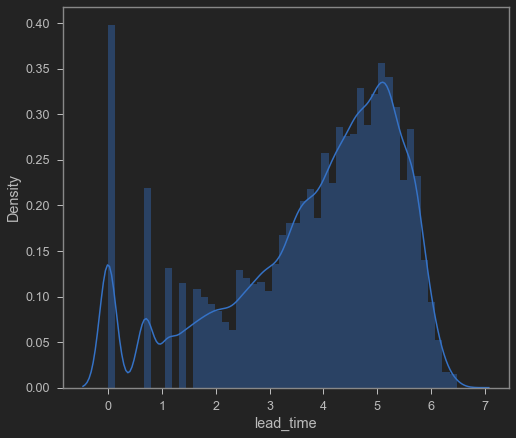

In [346]:
sns.distplot(dataframe['lead_time'].dropna())

<AxesSubplot:xlabel='adr', ylabel='Density'>

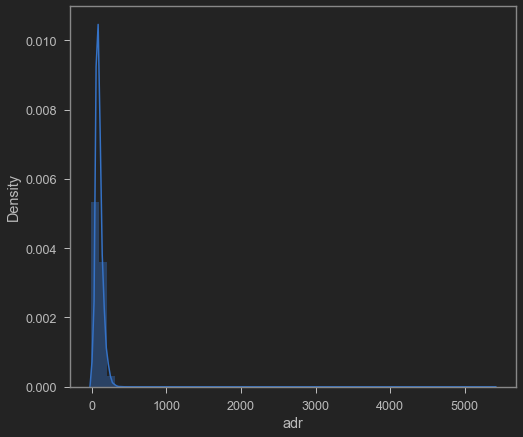

In [347]:
sns.distplot(dataframe['adr'])

In [348]:
handle_outlier('adr')

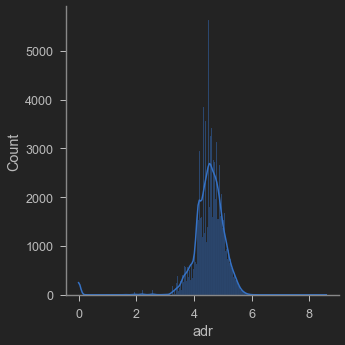

In [349]:
sns.displot(dataframe['adr'].dropna(), kde= True)

In [350]:
dataframe.isna().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [351]:
dataframe.dropna(inplace=True)

In [352]:
y=dataframe['is_canceled']
x=dataframe.drop('is_canceled',axis=1)

### Importance Feature

In [353]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [354]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state= 0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [355]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True])

In [356]:
cols= x.columns
selected_feat= cols[(feature_sel_model.get_support())]

In [357]:
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 28
selected features: 14


In [358]:
selected_feat

Index(['deposit_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [359]:
x= x[selected_feat]
x.head()

,deposit_type,year,month,day,lead_time,arrival_date_week_number,adults,children,previous_cancellations,booking_changes,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.28402,2015,7,1,5.837730,27,2,0.0,0,3,0.0,0.000000,0,0
1,0.28402,2015,7,1,6.603944,27,2,0.0,0,4,0.0,0.000000,0,0
2,0.28402,2015,7,2,2.079442,27,1,0.0,0,0,0.0,4.330733,0,0
3,0.28402,2015,7,2,2.639057,27,1,0.0,0,0,0.0,4.330733,0,0
4,0.28402,2015,7,3,2.708050,27,2,0.0,0,0,0.0,4.595120,0,1


### Splitting data & Model Creation

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [361]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [362]:
scaler= MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [375]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [376]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('XGB', XGBClassifier()))
models.append(('CatBoost', CatBoostClassifier()))

<IPython.core.display.Javascript object>

In [377]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[14441  4267]
 [  487  4647]]
0.8006039761764953


Naive Bayes
[[ 3927   418]
 [11001  8496]]
0.5210552805972654


RandomForest
[[14826  1012]
 [  102  7902]]
0.9532757319016861


Decision Tree
[[14295   647]
 [  633  8267]]
0.9463132287559769


KNN
[[14545  1524]
 [  383  7390]]
0.9200150994044124


XGB
[20:25:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[14889   610]
 [   39  8304]]
0.9727791292676788


CatBoost
Learning rate set to 0.072134
0:	learn: 0.6316690	total: 193ms	remaining: 3m 12s
1:	learn: 0.5917234	total: 205ms	remaining: 1m 42s
2:	learn: 0.5617776	total: 216ms	remaining: 1m 11s
3:	learn: 0.5385966	total: 227ms	remaining: 56.6s
4:	learn: 0.5177944	total: 239ms	remaining: 47.7s
5:	learn: 0.4948278	total: 251ms	remaining: 41.6s
6:	learn: 0.4766173	total: 2

162:	learn: 0.1721717	total: 2.17s	remaining: 11.2s
163:	learn: 0.1720577	total: 2.18s	remaining: 11.1s
164:	learn: 0.1716247	total: 2.2s	remaining: 11.1s
165:	learn: 0.1715162	total: 2.21s	remaining: 11.1s
166:	learn: 0.1706597	total: 2.22s	remaining: 11.1s
167:	learn: 0.1701746	total: 2.23s	remaining: 11.1s
168:	learn: 0.1700527	total: 2.24s	remaining: 11s
169:	learn: 0.1697412	total: 2.26s	remaining: 11s
170:	learn: 0.1696461	total: 2.27s	remaining: 11s
171:	learn: 0.1695128	total: 2.28s	remaining: 11s
172:	learn: 0.1694190	total: 2.29s	remaining: 10.9s
173:	learn: 0.1688293	total: 2.3s	remaining: 10.9s
174:	learn: 0.1683123	total: 2.31s	remaining: 10.9s
175:	learn: 0.1672322	total: 2.32s	remaining: 10.9s
176:	learn: 0.1670163	total: 2.33s	remaining: 10.9s
177:	learn: 0.1666544	total: 2.35s	remaining: 10.8s
178:	learn: 0.1664981	total: 2.36s	remaining: 10.8s
179:	learn: 0.1662121	total: 2.37s	remaining: 10.8s
180:	learn: 0.1658799	total: 2.38s	remaining: 10.8s
181:	learn: 0.1651504	

330:	learn: 0.1290446	total: 4.33s	remaining: 8.75s
331:	learn: 0.1289020	total: 4.34s	remaining: 8.73s
332:	learn: 0.1285835	total: 4.35s	remaining: 8.72s
333:	learn: 0.1284378	total: 4.37s	remaining: 8.7s
334:	learn: 0.1283887	total: 4.38s	remaining: 8.69s
335:	learn: 0.1283377	total: 4.39s	remaining: 8.67s
336:	learn: 0.1280713	total: 4.4s	remaining: 8.65s
337:	learn: 0.1280082	total: 4.41s	remaining: 8.64s
338:	learn: 0.1279032	total: 4.42s	remaining: 8.62s
339:	learn: 0.1278332	total: 4.43s	remaining: 8.61s
340:	learn: 0.1275334	total: 4.45s	remaining: 8.6s
341:	learn: 0.1273612	total: 4.46s	remaining: 8.58s
342:	learn: 0.1272415	total: 4.47s	remaining: 8.56s
343:	learn: 0.1271715	total: 4.48s	remaining: 8.54s
344:	learn: 0.1269608	total: 4.49s	remaining: 8.53s
345:	learn: 0.1266874	total: 4.5s	remaining: 8.51s
346:	learn: 0.1266156	total: 4.51s	remaining: 8.5s
347:	learn: 0.1265413	total: 4.53s	remaining: 8.48s
348:	learn: 0.1264719	total: 4.54s	remaining: 8.46s
349:	learn: 0.126

504:	learn: 0.1084124	total: 6.47s	remaining: 6.34s
505:	learn: 0.1082306	total: 6.48s	remaining: 6.33s
506:	learn: 0.1081588	total: 6.5s	remaining: 6.32s
507:	learn: 0.1080645	total: 6.51s	remaining: 6.3s
508:	learn: 0.1079780	total: 6.52s	remaining: 6.29s
509:	learn: 0.1079123	total: 6.54s	remaining: 6.28s
510:	learn: 0.1078907	total: 6.55s	remaining: 6.27s
511:	learn: 0.1077410	total: 6.57s	remaining: 6.26s
512:	learn: 0.1077073	total: 6.58s	remaining: 6.25s
513:	learn: 0.1076386	total: 6.59s	remaining: 6.23s
514:	learn: 0.1076162	total: 6.61s	remaining: 6.22s
515:	learn: 0.1075961	total: 6.62s	remaining: 6.21s
516:	learn: 0.1075598	total: 6.63s	remaining: 6.2s
517:	learn: 0.1075307	total: 6.65s	remaining: 6.18s
518:	learn: 0.1074272	total: 6.66s	remaining: 6.17s
519:	learn: 0.1073299	total: 6.67s	remaining: 6.16s
520:	learn: 0.1072912	total: 6.69s	remaining: 6.15s
521:	learn: 0.1072404	total: 6.7s	remaining: 6.14s
522:	learn: 0.1070965	total: 6.71s	remaining: 6.12s
523:	learn: 0.10

667:	learn: 0.0975789	total: 8.44s	remaining: 4.2s
668:	learn: 0.0975272	total: 8.45s	remaining: 4.18s
669:	learn: 0.0975036	total: 8.47s	remaining: 4.17s
670:	learn: 0.0974396	total: 8.48s	remaining: 4.16s
671:	learn: 0.0974203	total: 8.49s	remaining: 4.14s
672:	learn: 0.0973859	total: 8.5s	remaining: 4.13s
673:	learn: 0.0972612	total: 8.51s	remaining: 4.12s
674:	learn: 0.0971448	total: 8.52s	remaining: 4.1s
675:	learn: 0.0971351	total: 8.53s	remaining: 4.09s
676:	learn: 0.0970475	total: 8.54s	remaining: 4.08s
677:	learn: 0.0970269	total: 8.56s	remaining: 4.06s
678:	learn: 0.0970124	total: 8.57s	remaining: 4.05s
679:	learn: 0.0969737	total: 8.58s	remaining: 4.04s
680:	learn: 0.0968958	total: 8.59s	remaining: 4.02s
681:	learn: 0.0968695	total: 8.6s	remaining: 4.01s
682:	learn: 0.0968482	total: 8.61s	remaining: 3.99s
683:	learn: 0.0968088	total: 8.62s	remaining: 3.98s
684:	learn: 0.0967933	total: 8.63s	remaining: 3.97s
685:	learn: 0.0967615	total: 8.64s	remaining: 3.95s
686:	learn: 0.09

832:	learn: 0.0893996	total: 10.4s	remaining: 2.09s
833:	learn: 0.0893887	total: 10.4s	remaining: 2.08s
834:	learn: 0.0893594	total: 10.4s	remaining: 2.06s
835:	learn: 0.0893323	total: 10.5s	remaining: 2.05s
836:	learn: 0.0892889	total: 10.5s	remaining: 2.04s
837:	learn: 0.0892277	total: 10.5s	remaining: 2.03s
838:	learn: 0.0891489	total: 10.5s	remaining: 2.01s
839:	learn: 0.0890412	total: 10.5s	remaining: 2s
840:	learn: 0.0890103	total: 10.5s	remaining: 1.99s
841:	learn: 0.0889735	total: 10.5s	remaining: 1.97s
842:	learn: 0.0889546	total: 10.5s	remaining: 1.96s
843:	learn: 0.0889031	total: 10.6s	remaining: 1.95s
844:	learn: 0.0888687	total: 10.6s	remaining: 1.94s
845:	learn: 0.0888161	total: 10.6s	remaining: 1.92s
846:	learn: 0.0887420	total: 10.6s	remaining: 1.91s
847:	learn: 0.0887143	total: 10.6s	remaining: 1.9s
848:	learn: 0.0886857	total: 10.6s	remaining: 1.89s
849:	learn: 0.0886594	total: 10.6s	remaining: 1.87s
850:	learn: 0.0886113	total: 10.6s	remaining: 1.86s
851:	learn: 0.08

[[14905   683]
 [   23  8231]]
0.9703883902357184




from model above we can see XGB has highest accuracy. we will try creating deep learning model to see which one is better

In [366]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [382]:
model= Sequential()

model.add(Dense(14,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [383]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=400,
          batch_size=128,
          validation_data=(x_test, y_test), verbose= 0
          )

<AxesSubplot:>

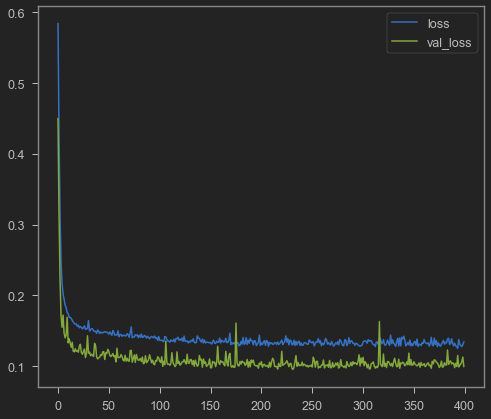

In [384]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [370]:
from sklearn.metrics import classification_report, confusion_matrix

In [385]:
predictions = model.predict(x_test).astype(int)

In [386]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14928
           1       1.00      0.70      0.82      8914

    accuracy                           0.89     23842
   macro avg       0.92      0.85      0.87     23842
weighted avg       0.91      0.89      0.88     23842



In [387]:
print(accuracy_score(y_test,predictions))

0.8880127506081704


##### There are some model that we tested:

- GaussianNB
- KNeighborsClassifier
- RandomForestClassifier
- DecisionTreeClassifier
- XGBClassifier
- CatBoostClassifier
- Deep Learning

##### The best algorithm belongs to XGBClassifier with 97% accuracy on the test score. From the Deep Learning models we got 89% accuracy. So that we will use the XGBClassifier models to predict our future customer.

In [388]:
import random
random.seed(103)
random_ind = random.randint(0,len(dataframe))
new_customer = dataframe[selected_feat].iloc[random_ind]
new_customer

deposit_type                      0.284020
year                           2016.000000
month                             7.000000
day                              25.000000
lead_time                         3.218876
arrival_date_week_number         30.000000
adults                            2.000000
children                          0.000000
previous_cancellations            0.000000
booking_changes                   0.000000
company                           0.000000
adr                               4.941642
required_car_parking_spaces       0.000000
total_of_special_requests         1.000000
Name: 93709, dtype: float64

In [391]:
models[5][1].predict(new_customer.values.reshape(1,14))

array([0], dtype=int64)

In [392]:
if (dataframe.iloc[random_ind]['is_canceled']==1.0):
    print('This person will cancel the book')
else:
    print('This person will not cancel the book')

This person will not cancel the book


#### From the booked data of the new customer, we could say that this customer has 97% chance that he/she wouldn't cancel the booked hotel. However, there are so many other consideration for customer to cancel the book or not, this model could help us to predict the real hotel booking and help us on crowd season.